In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from functions import load_and_clean_csv,get_top_n_groups_by_sum,get_top_n_groups_by_mean,get_top_n_groups_by_percentage,plot_obesity_percentage,plot_bar_with_values,plot_bar_without_values,plot_age_distribution,plot_bar_without_values_2,plot_population_pyramid

In [18]:
url = "https://raw.githubusercontent.com/AlejandroAlegrePinilla/FitRing/main/merged_data.csv"
df = load_and_clean_csv(url)
df.sample(10)

,age,sex,blood_pressure,heart_rate,obesity,exercise_hours_per_week,sedentary_hours_per_day,bmi,physical_activity_days_per_week,sleep_hours_per_day,country,gdp,population
1632,42,Female,92/109,50,1,0,0,35,6,8,Spain,1425,47.40
113,19,Female,91/91,109,1,8,2,32,6,4,France,2937,67.63
2226,21,Male,176/62,98,1,19,0,28,4,5,United Kingdom,3187,67.53
1421,38,Female,173/95,62,0,3,5,31,3,9,Spain,1425,47.40
2045,84,Male,154/99,74,0,2,2,23,0,8,United Kingdom,3187,67.53
2047,71,Male,165/63,46,1,10,0,18,1,4,United Kingdom,3187,67.53
2145,85,Male,109/69,96,1,11,5,33,4,10,United Kingdom,3187,67.53
838,50,Male,124/78,62,1,9,7,28,4,4,Germany,4223,83.16
1200,70,Male,126/92,48,0,0,3,39,5,4,Italy,2100,59.24
1603,64,Male,158/98,90,1,9,3,24,2,6,Spain,1425,47.40


Top 5 countries with more obesity

In [19]:
top_5_obesity = get_top_n_groups_by_sum(df, "country", "obesity", n=5)
top_5_obesity

,country,obesity
0,France,244
4,United Kingdom,234
1,Germany,233
2,Italy,214
3,Spain,199


In [20]:
top_5_obesity_percentage = get_top_n_groups_by_percentage(df, "country", "obesity", n=5)
top_5_obesity_percentage

,country,total_numerator,total_denominator,percentage
0,France,244,446,54.708520
4,United Kingdom,234,457,51.203501
2,Italy,214,431,49.651972
1,Germany,233,477,48.846960
3,Spain,199,430,46.279070


Top 5 countries with more GDP

In [21]:
top_5_gdp = get_top_n_groups_by_mean(df, "country", ["gdp"], n=5)
top_5_gdp

,country,gdp
1,Germany,4223.0
4,United Kingdom,3187.0
0,France,2937.0
2,Italy,2100.0
3,Spain,1425.0


Top 5 countries with less physical activity days per week

In [22]:
group_physical_activity_days_per_week = df.groupby('country')["physical_activity_days_per_week"].mean().reset_index()
top_5_physical_activity_days_per_week = group_physical_activity_days_per_week.sort_values(by='physical_activity_days_per_week', ascending=True).head(5)
top_5_physical_activity_days_per_week

,country,physical_activity_days_per_week
1,Germany,3.452830
2,Italy,3.484919
0,France,3.495516
4,United Kingdom,3.654267
3,Spain,3.655814


Top 5 countries with more sedentary hours per day

In [23]:
top_5_sedentary_hours_per_day = get_top_n_groups_by_mean(df, "country", ["sedentary_hours_per_day"], n=5)
top_5_sedentary_hours_per_day

,country,sedentary_hours_per_day
4,United Kingdom,5.621444
2,Italy,5.419954
3,Spain,5.409302
1,Germany,5.238994
0,France,5.152466


Top 5 countries

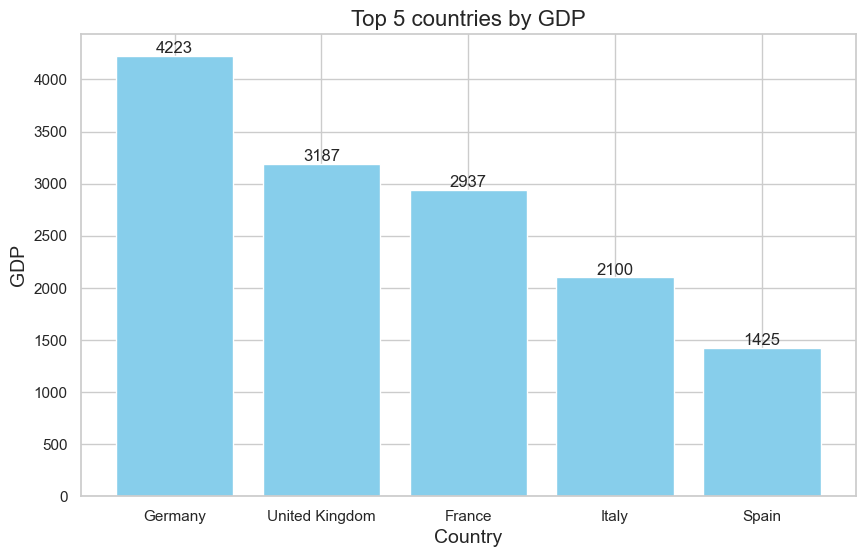

In [24]:
plot_bar_with_values(top_5_gdp, "country", "gdp", "Top 5 countries by GDP", "Country", "GDP")

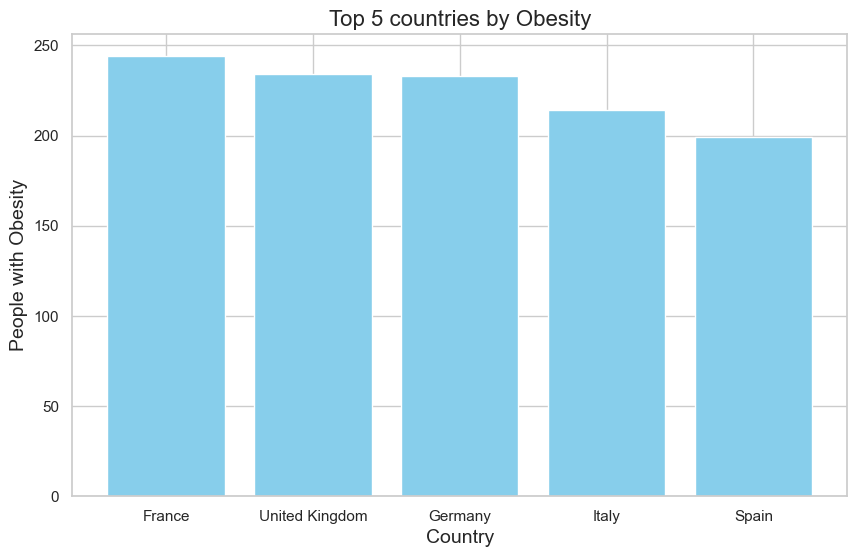

In [25]:
plot_bar_without_values(top_5_obesity, "country", "obesity", "Top 5 countries by Obesity", "Country", "People with Obesity")

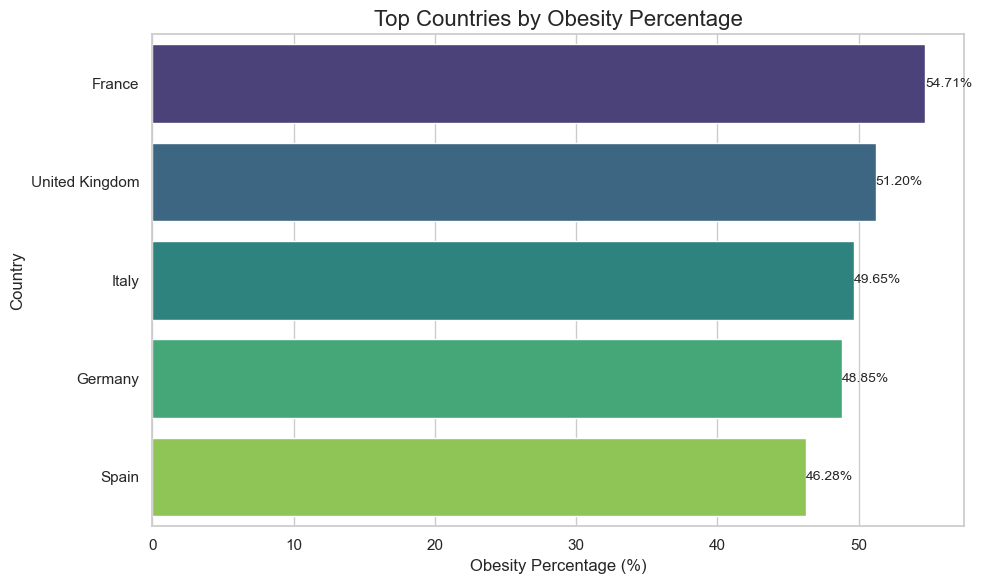

In [26]:
plot_obesity_percentage(top_5_obesity_percentage)

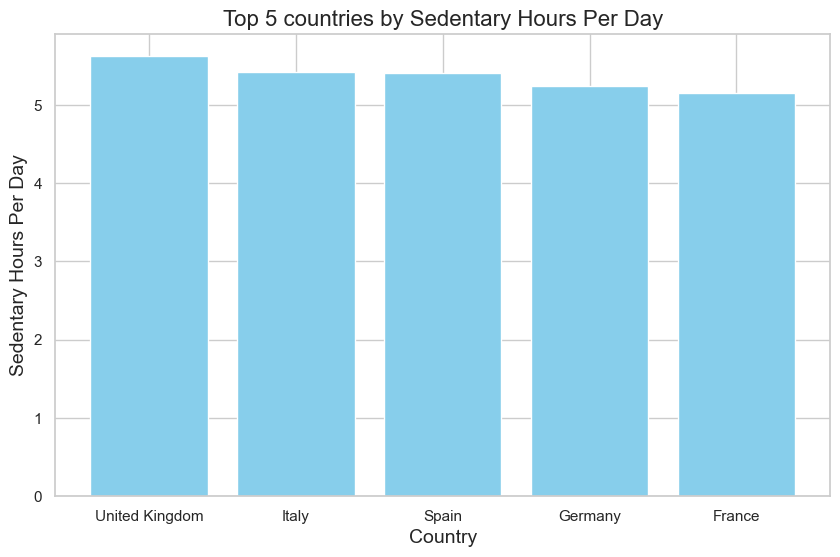

In [27]:
plot_bar_without_values(top_5_sedentary_hours_per_day, "country", "sedentary_hours_per_day", "Top 5 countries by Sedentary Hours Per Day", "Country", "Sedentary Hours Per Day")

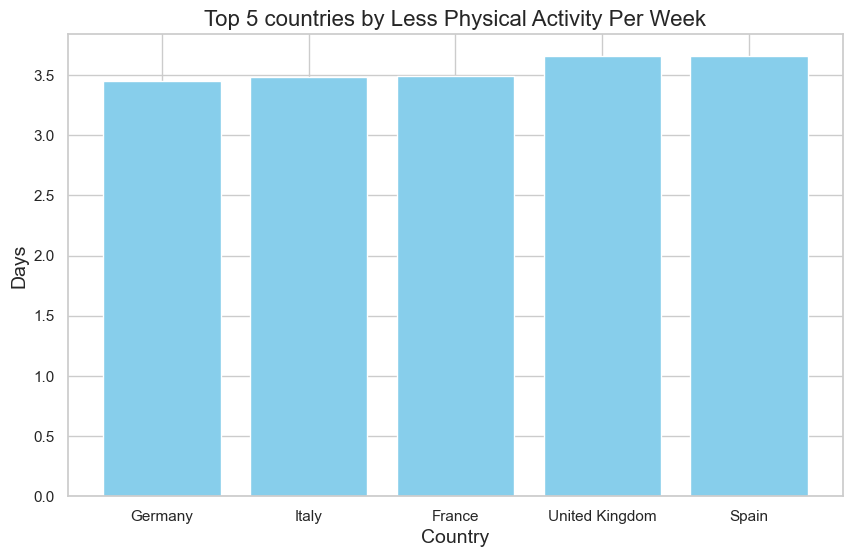

In [28]:
plot_bar_without_values(top_5_physical_activity_days_per_week, "country", "physical_activity_days_per_week", "Top 5 countries by Less Physical Activity Per Week", "Country", "Days")

Germany Age Distribution

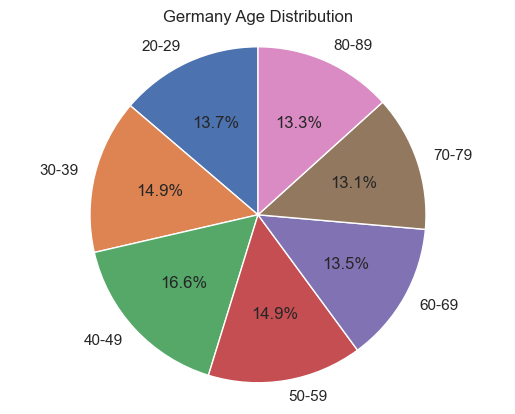

In [29]:
age_bins = [20, 29, 39, 49, 59, 69, 79, 89]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']

plot_age_distribution(df, "Germany", age_bins, age_labels)

c:\Users\alexa\OneDrive\Documentos\GitHub\Labs\FitRing\functions.py:277: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_counts = df_country.groupby(['age_group', 'sex']).size().unstack().fillna(0)


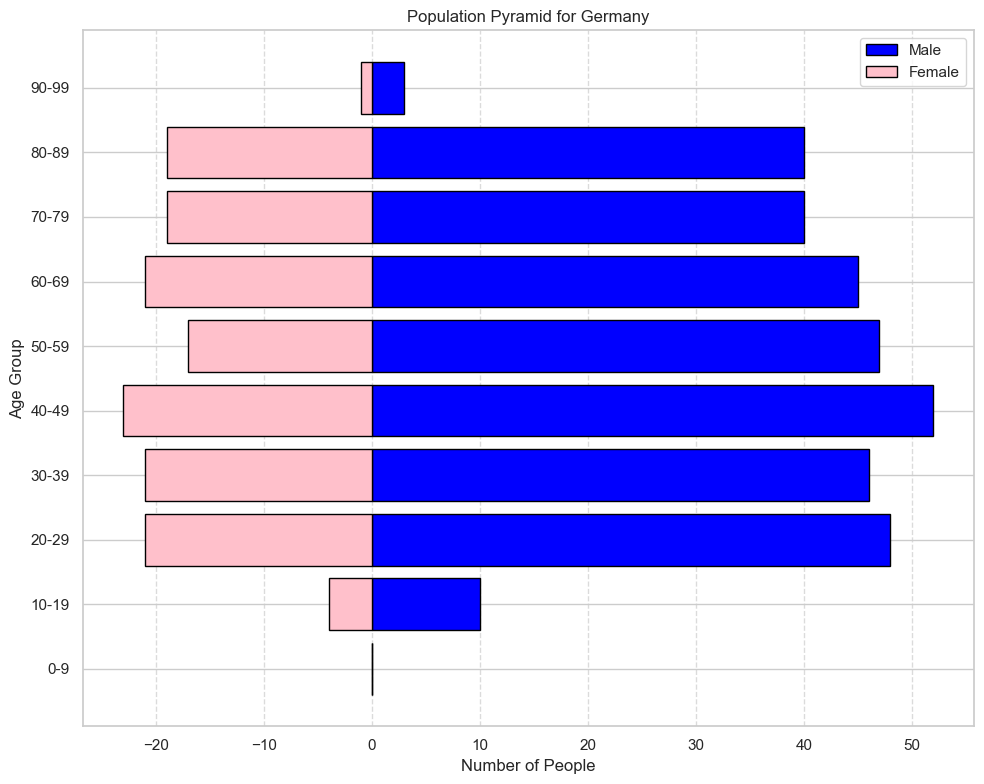

In [30]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']

plot_population_pyramid(df, 'Germany', age_bins, age_labels)

In [31]:
merged_df = pd.merge(top_5_sedentary_hours_per_day, top_5_physical_activity_days_per_week, on='country')
merged_df_sorted = merged_df.sort_values(by='physical_activity_days_per_week')

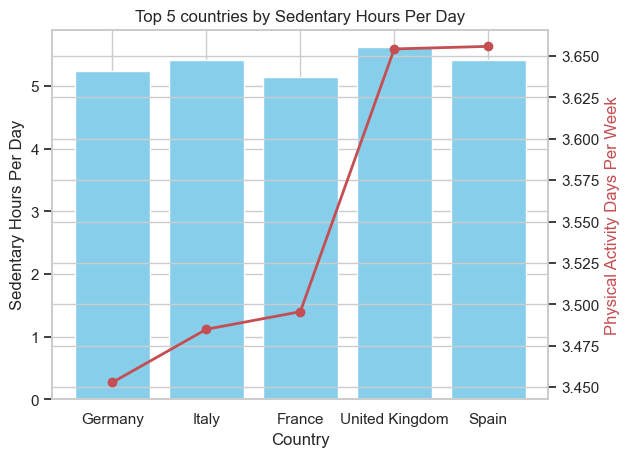

In [33]:
fig, ax1 = plt.subplots()
plot_bar_without_values_2(merged_df_sorted, "country", "sedentary_hours_per_day", "Top 5 countries by Sedentary Hours Per Day", "Country", "Sedentary Hours Per Day", ax1, color='skyblue')

ax2 = ax1.twinx()
ax2.plot(merged_df_sorted['country'], merged_df_sorted['physical_activity_days_per_week'], color='r', marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel('Physical Activity Days Per Week', color='r')

plt.show()